# Reading

Read the eighth and ninth chapter (pg 141-178) of *Weapons of Math Destruction* and summarize the main ideas below.

1. **Why does O'Neil think more highly of FICO credit scores than of their "e-score" mimics?**

FICO scores have a clear feed-back loop and models are corrected to stay correct. How to improve score is clearly stated. E-scores on the other hand use models with lots of data pulled from all sorts of places that are much less straightforward then FICO's. E-scores are a classic black-box model where FICO scores are very transparent. The e-scores use scraped data that targets different geographic, behavioral, historic factors (such as IP address & browsing history) that end up targeting certain groups giving them lower credit scores.

2. **How is it that, despite their good qualities, FICO credit scores still end up being linked to race?**
This is because FICO scores have been incorportated by employers in the hire and promotion process. This creates a positive feedback of wealth where those with less wealth have harder times getting jobs or raises which further keeps the credit score down which is used to determine if they get a raise or job. As white households have on average 10X more wealth then non-white groups, using a FICO score to determine hiring decisions becomes a proxie for race.

3. **Why does O'Neil disapprove of the use of credit scores in hiring and insurance pricing?**
Becuase wealth is not distributed evenly throughout the country and groups and so inherently discriminates against some groups. Further more this an extreme feedback loop where to get a job/raise you need a good credit score but to get a good credit score you need to have money which comes from a job and raises. Insurance on the other hand also uses FICO scores for pricing to essentially idenitfy groups that they can spike prices for with no reprocusions - generally groups who do not know they are being taken advantage of. This is primiarly possible because the model is not clear so people cannot see which factors lead to their pricing.  


# Dataset

A town would like to be able to predict whether or not it will rain tomorrow based on the weather conditions today.

They have compiled a [dataset](http://myslu.stlawu.edu/~ltorrey/ml/Rain.csv) over 3028 days that is fairly self-explanatory.

Familiarize yourself with this dataset. Specifically:

1. **Download the data and inspect the first few rows.**
2. **Check the class balance. Do you expect SVMs or decision trees to have any trouble with this?**
3. **Check for missing values. What seems like the best way to handle these?**
4. **Produce two plots that tell you something about the data, and explain what they tell you.**


In [1]:
import pandas as pd
import seaborn as sns

rain = pd.read_csv("http://myslu.stlawu.edu/~ltorrey/ml/Rain.csv")
rain

,min_temp,max_temp,wind_gust_dir,wind_gust_speed,wind_dir_9am,wind_dir_3pm,wind_speed_9am,wind_speed_3pm,humidity_9am,humidity_3pm,pressure_9am,pressure_3pm,cloud_9am,cloud_3pm,temp_9am,temp_3pm,today,tomorrow
0,5.8,17.6,W,52.0,W,WNW,26.0,30.0,71.0,37.0,1008.2,1007.5,6.0,NaN,10.4,15.7,Yes,No
1,4.3,19.5,WNW,44.0,WNW,WNW,20.0,24.0,66.0,47.0,1009.3,1007.3,6.0,8.0,12.5,17.6,No,No
2,9.5,18.8,W,43.0,WSW,SW,22.0,20.0,82.0,42.0,1009.5,1011.5,4.0,8.0,11.2,16.5,No,No
3,6.7,21.8,NNE,39.0,ENE,N,9.0,22.0,60.0,33.0,1016.2,1012.6,4.0,NaN,14.4,20.6,No,Yes
4,13.3,25.6,NW,61.0,NNW,NW,30.0,39.0,74.0,40.0,1006.6,1005.5,6.0,1.0,18.3,24.3,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,4.9,11.2,SSE,26.0,SSW,SSE,4.0,15.0,100.0,96.0,1029.3,1028.4,8.0,8.0,7.9,10.2,No,No
3024,3.9,10.6,N,30.0,NNE,NNE,13.0,17.0,98.0,91.0,1028.3,1025.3,8.0,8.0,7.5,10.0,No,No
3025,4.8,9.0,N,46.0,N,N,24.0,24.0,100.0,98.0,1019.3,1014.8,8.0,8.0,5.1,8.6,No,Yes
3026,4.0,8.5,SSW,30.0,WSW,W,6.0,17.0,100.0,71.0,1019.3,1017.8,3.0,8.0,4.9,7.4,Yes,No


In [2]:
# Class balance
# In a tree a class imbalance could pose a problem with the tree finding split points to minimize class overlap in each descision but with so few of one
# class it could lead to splitting based on majority class. This results in an less accurate tree but given the class balance is not that extreme I do not beleive this will
# be a major problem. Similarly SVM models with extreme class imbalance tend to bias towards the majority class (such as 99% one classifier).
# As the imbalance is not that extreme I do not think this will be a problem. Both SVMs and Trees depend primarily on seperatble classifiers and as long as they
# are seperatable predicitors by classifier the slight class imbalance should not play a major role. In addition if this does end up being a problem we should measure other metrics
# beyond accuracy (if 95% of data is one class, accuracy = .95 to predict majority).

rain["tomorrow"].value_counts()
# Problems? IDK

No     2247
Yes     781
Name: tomorrow, dtype: int64

In [3]:
# Null values
rain.isna().sum()
# Simple Imputer
# Seeing as most of the predictors do not have many missing values I am going to fill in the null values with the most frequent
# for catagorical and the average for numerical. The cloud data could be problematic with almost 1/3 of the cloud_3pm data being null. Filling the missing values
# the most common values will allow us to keep this variable in our data set without extreme changes.

min_temp              1
max_temp              1
wind_gust_dir        24
wind_gust_speed      24
wind_dir_9am         91
wind_dir_3pm         16
wind_speed_9am        8
wind_speed_3pm        3
humidity_9am         21
humidity_3pm          6
pressure_9am         24
pressure_3pm         24
cloud_9am           544
cloud_3pm          1041
temp_9am             12
temp_3pm              5
today                11
tomorrow              0
dtype: int64

<Axes: xlabel='tomorrow', ylabel='pressure_3pm'>

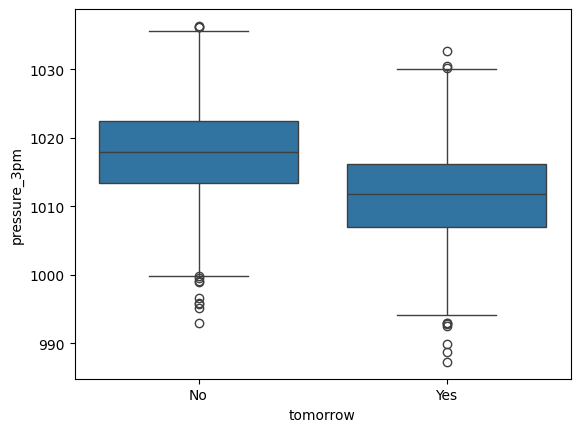

In [4]:
sns.boxplot(data = rain, y ="pressure_3pm", x = "tomorrow")
# This boxplot shows the distribition of pressures in days that rained the next day vs days that did not. Through this visual
# we can see that on days it rained the pressure at 3pm the day before was generally lower then days it did not rain.
# This could indicate that this is a useful predictor for our model which tries to predict weather tomorrow based off todays data.


<Axes: xlabel='pressure_3pm', ylabel='humidity_3pm'>

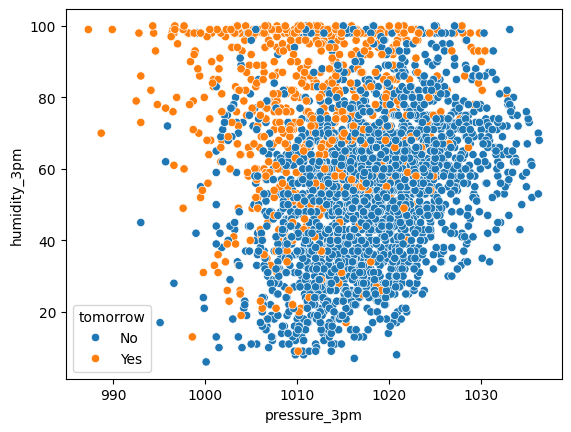

In [5]:
sns.scatterplot(data = rain, x = "pressure_3pm", y = "humidity_3pm", hue = "tomorrow")
# This plot shows the relationship between humidity and pressure at the same time. Between these two predictors there doesnt seem to be any
# crazy relationship but once we color by if it rains tomorrow, the classifier, we see a new trend. It apprears that there are
# much fewer rainy days when the pressure is high at 3PM and the fact that and even fewer when pressure is high and humidty is low.
# We can see that the majority of rainy days are at higher humidtyes and generally at lower pressures.
# This could indicate good predictors to use in our models. While there is lots of jitter, it is almost feasble to draw a line seperating the majority
# of the rainy days and not rainy days.


# SVM classification

Do some initial experiments with SVM classifiers. Specifically:

1. **Prepare the data for SVM classification.**
2. **Check the baseline accuracy with a linear SVM.**
3. **Check the baseline accuracy with a Gaussian SVM.**



In [6]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Separate features and target
x = rain.drop("tomorrow", axis=1)
y = rain["tomorrow"]

# Fills in blanks with most frequent for catagorical and then onehotencodes. For numeric, fills in blanks with mean then scales.
transformer = make_column_transformer(
    (make_pipeline(SimpleImputer(add_indicator = True, strategy= "most_frequent"),
    OneHotEncoder(drop="first")),["wind_gust_dir","wind_dir_9am", "wind_dir_3pm","today"]),
    remainder = (make_pipeline(SimpleImputer(add_indicator = True, strategy= "most_frequent"), StandardScaler()))
)

# Baseline accuracy
svm = make_pipeline(transformer,LinearSVC(max_iter = 30000))
cross_val_score(svm,x,y).mean()

0.837510296484194

In [7]:
poly_svm = make_pipeline(transformer, SVC(kernel="poly", degree = 2))
cross_val_score(poly_svm,x,y).mean()

0.8305785123966942

In [8]:
rbf_svc = make_pipeline(transformer, SVC(kernel = "rbf"))
cross_val_score(rbf_svc,x,y).mean()

0.8401532880560783

# Ensemble classification

Do some initial experiments with ensemble classifiers. Specifically:

1. **Prepare the data for decision tree classification.**
2. **Check the baseline accuracy with a random forest.**
3. **Check the baseline accuracy with a boosted ensemble.**

In [9]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
# data does not need to be scaled for trees but still going to impute null values with same tactic and going to one hot encode
transformer = make_column_transformer(
    (make_pipeline(SimpleImputer(add_indicator = True, strategy= "most_frequent"),
    OneHotEncoder(drop="first")),["wind_gust_dir","wind_dir_9am", "wind_dir_3pm","today"]),
    remainder = (make_pipeline(SimpleImputer(add_indicator = True, strategy= "most_frequent")))
)

# baseline accuracy
forest = make_pipeline(transformer,RandomForestClassifier())
cross_val_score(forest,x,y).mean()

0.8388353380792625

In [10]:
# Boosted Ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Baseline for boosting ensemble
ensemble = make_pipeline(transformer,HistGradientBoostingClassifier())
cross_val_score(ensemble,x,y).mean()

0.8358639500313668

# Tuning

Choose one classifier from your initial experiments and see if you can improve it through tuning. Specifically:

1. **Choose hyperparameter settings to try.**
2. **Estimate the tuned accuracy of the classifier.**
3. **Build a final model and report its hyperparameters.**

In [11]:
# Tuning boosting ensemble
hyperparameters = {
    "histgradientboostingclassifier__max_iter":[100,200,300,400],
    "histgradientboostingclassifier__max_depth":range(1,15),
    "histgradientboostingclassifier__min_samples_leaf":range(1,10)
}


tuned_ensemble = RandomizedSearchCV(ensemble,hyperparameters)
cross_val_score(tuned_ensemble,x,y).mean()


0.8342126939966725

In [12]:
final_ensemble = RandomizedSearchCV(ensemble,hyperparameters).fit(x,y)
final_ensemble.best_params_

{'histgradientboostingclassifier__min_samples_leaf': 8,
 'histgradientboostingclassifier__max_iter': 200,
 'histgradientboostingclassifier__max_depth': 13}